In [ ]:
# Questão 1

import numpy as np

n = 10 # número de elementos na sequência de fibonaci
seq = np.ones(n) # Array em que fica armazenado os números da sequência
def fibo(i):
  if i <= 1:
    return i
  else:
    return fibo(i-1) + fibo(i-2)
for i in range(n):
  seq[i] = fibo(i)
print(seq)

[ 0.  1.  1.  2.  3.  5.  8. 13. 21. 34.]


/tmp/ipython-input-3320194519.py:9: RuntimeWarning: divide by zero encountered in divide
  return 1/(x)**0.5


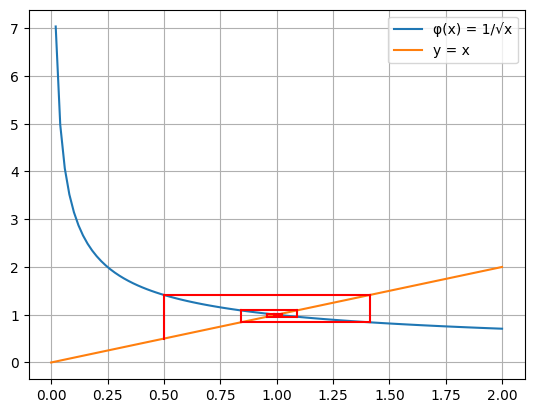

'O ponto fixo ocorre em 0.9999999999596536'

In [ ]:
# Questão 2

import numpy as np
import matplotlib.pyplot as plt

# Definindo a função fi

def fi(x):
  return 1/(x)**0.5

# Definindo a função identidade

def identidade(x):
  return x

def ponto_fixo(func, xo, erro, N):
  x = xo
  yo = xo
  counter = 0
  try:
    while(abs(fi(x) - x) > erro):
      if counter == N:
        raise ValueError(f"Atigiu-se o número máximo de irerações que são {N} e não foi possível encontrar o ponto fixo.")
      y =  fi(x)
      xo = x
      plt.plot([xo,yo], [xo,y], color = 'r')
      x = y
      plt.plot([xo,y], [x,y], color = 'r')
      yo = y
      counter += 1
  except ValueError as e:
    print(e)
    return 1

  plt.show()
  return f"O ponto fixo ocorre em {x}"

N = 1000 # Parâmetro utilizado para parada por número de iterações
erro = 10**-10 # Parâmetro utilizada para parada devido ao erro do valor gerado
xo = 0.5 # Ponto inicial

# Plotando o gráfico

dom = np.linspace(0, 2, 100)
plt.plot(dom, fi(dom), label = "φ(x) = 1/√x")
plt.plot(dom, identidade(dom), label = "y = x", )
plt.legend()
plt.grid(True)
ponto_fixo(fi, xo, erro, N)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]


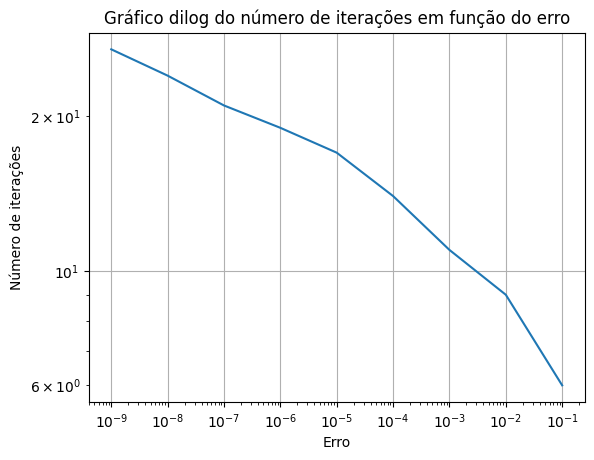

In [ ]:
# Questão 3

import numpy as np

def is_solution(M, c, s, erro):
  if abs((M @ c)[0] - s[0]) < erro and abs((M @ c)[1] - s[1]) < erro:
    return True
  return False

def ite_jacobi(M, s , co, erro, N):
  c = co
  counter = 0
  try:
    if counter == N:
      raise ValueError(f"Atigiu-se o número máximo de irerações que são {N} e não foi possível encontrar a solução para o sistema.")
    while(is_solution(M, c, s, erro) == False):
      c = np.array([(s[0] - M[0][1]*co[1])/M[0][0]  , (s[1] - M[1][0]*co[0])/M[1][1]])
      counter += 1
      co = c
  except ValueError as e:
    print(e)
    return 1
  return (f"A solução é {c}", counter)

M = np.array([[3, -1], [-2,4]])
s = np.array([2, 1])
co = np.array([0, 5])
N = 10*10 # Número de iterações
erros  = [10**-i for i in range(1, 10)]
print(erros)
imagem = []


for erro in erros:
  imagem.append(ite_jacobi(M, s, co, erro, N)[1])

plt.plot(erros, imagem)
plt.ylabel("Número de iterações")
plt.xlabel("Erro")
plt.title("Gráfico dilog do número de iterações em função do erro")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [ ]:
# Questão 4

import numpy as np

def is_solution(M, c, s, erro):
    mascara = abs((M @ c) - s) < erro
    return np.all(mascara)

def ite_jacobi(M, s, co, erro, N):
    c = co
    counter = 0
    try:
        while is_solution(M, c, s, erro) == False:
            if counter >= N:
                raise ValueError(f"Atingiu-se o número máximo de iterações ({N}) e não foi possível encontrar a solução.")

            c = np.zeros_like(co, dtype = float)
            for i in range(M.shape[0]):
                somatorio = 0
                for j in range(M.shape[0]):
                    if j != i:
                        somatorio += M[i][j] * co[j]
                c[i] = (s[i] - somatorio) / M[i][i]

            if counter % 10 == 0:
                print(f"{counter}: {c}")

            counter += 1
            co = c.copy()

    except ValueError as e:
        print(e)
        return 1

    return f"A solução é {c}"

M = np.array([
    [10, -1,  2,  0,  0],
    [-1, 11, -1,  3,  0],
    [ 2, -1, 10, -1,  0],
    [ 0,  3, -1,  8, -2],
    [ 0,  0,  0, -2,  9]
], dtype=float)

s = np.array([6, 25, -11, 15, 6], dtype=float)
co = np.array([0, 0, 0,0,0], dtype = float)
N = 1000
erro = 10**-10

print(ite_jacobi(M, s, co, erro, N))

0: [ 0.6         2.27272727 -1.1         1.875       0.66666667]
10: [ 0.98834561  1.92840517 -0.97835377  1.26698688  0.94802671]
20: [ 0.98846055  1.92819949 -0.97820346  1.26668819  0.94815283]
30: [ 0.98846061  1.92819938 -0.97820338  1.26668804  0.9481529 ]
A solução é [ 0.98846061  1.92819937 -0.97820338  1.26668804  0.9481529 ]


In [ ]:
# Questão 5

import numpy as np


# Essa função verifica que dada uma matriz M, uma um resultado c, o segundo membro s e um erro se é solução ao se aplicar o possiível resultado c e verificar se a subtração pelo segundo membro é menor que o erro, quanto mais próximo de zero melhor.
def is_solution(M, c, s, erro):
    mascara = np.linalg.norm(M @ c - s) < erro
    return np.all(mascara)

def ite_jacobi(M, s, co, erro, N):
    # c é que é a possível solução é igual ao chute inicial co
    c = co.copy()
    counter = 0
    try:
      # Enqunato a solução for falsa o metodo iterativo rodará
        while is_solution(M, c, s, erro) == False:
            if counter >= N:
                raise ValueError(f"Atingiu-se o número máximo de iterações ({N}) e não foi possível encontrar a solução.")

            c = np.zeros_like(co, dtype = float)
            for i in range(M.shape[0]):
                somatorio = 0
                for j in range(M.shape[0]):
                    if j != i:
                        somatorio += M[i][j] * co[j]
                c[i] = (s[i] - somatorio) / M[i][i]

            if counter % 10 == 0:
                print(f"{counter}: {c}")

            counter += 1
            co = c.copy()

    except ValueError as e:
        print(e)
        return 1

    return f"A solução é {c}"

n = 50
R = np.random.rand(n,n)
M = R * 10* n * np.identity(n)
s = np.random.rand(n)
co = np.zeros(n)
N = 1000
erro = 10**-2

print(ite_jacobi(M, s, co, erro, N))

0: [3.13472981e-03 1.96820886e-03 2.63371107e-04 3.11850641e-03
 4.52602860e-03 2.38688547e-03 1.49606402e-03 2.04303025e-04
 1.91006141e-03 2.45106829e-03 1.16770267e-03 8.40011972e-04
 2.49092302e-03 1.98642390e-03 4.50754864e-03 4.35944389e-04
 1.89546727e-03 1.84823958e-03 1.89394505e-04 1.75763732e-03
 1.84985070e-03 5.60593472e-04 3.55387943e-04 2.69911187e-03
 2.07609827e-03 1.08986041e-02 8.65931925e-04 1.73731795e-03
 1.26147874e-02 1.58356904e-03 4.12083353e-04 1.97324808e-03
 2.06864123e-03 1.72963952e-04 1.53375222e-03 6.82082266e-03
 5.10227190e-03 3.07722135e-03 1.74884357e-03 1.98299231e-03
 2.41205029e-03 1.55090421e-03 2.31707038e-04 1.53329310e-03
 8.85096431e-04 4.52242015e-04 4.45958287e-04 8.10347285e-04
 8.63817288e-05 2.34448765e-04]
A solução é [3.13472981e-03 1.96820886e-03 2.63371107e-04 3.11850641e-03
 4.52602860e-03 2.38688547e-03 1.49606402e-03 2.04303025e-04
 1.91006141e-03 2.45106829e-03 1.16770267e-03 8.40011972e-04
 2.49092302e-03 1.98642390e-03 4.50754

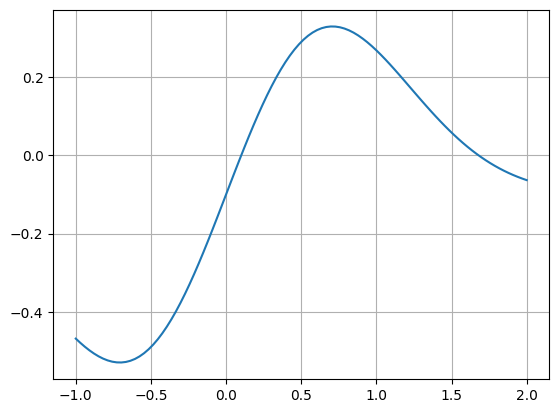

Uma raíz para essa função será 0.10102584831568519 e foi obitida com 4 iterações
Uma raíz para essa função será 1.67963061042845 e foi obitida com 5 iterações


In [ ]:
#Questão 6

import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

# Função a se encontrar as raízes
def func(x):
  return x * np.exp(-(x**2)) - 0.1
# Função derivada da função a se encontrar as raízes
def df(x):
  return np.exp(-(x**2)) - 2*(x**2)*np.exp(-(x**2))

def newton(xo, f, df, erro, N):

  for i in range(N):
    x = xo - f(xo)/df(xo)
    if (abs(f(x) - f(xo)) < erro):
      return f"Uma raíz para essa função será {x} e foi obitida com {i+1} iterações"
    xo = x

  return f"Com {N} iterações e a partir do erro equivalente a {erro}, não foi possível encontrar a raíz dessa função"


dom = np.linspace(-1, 2, 100)
plt.plot(dom, func(dom))
plt.grid()
plt.show()

print(newton(0.0, func, df, 10**-10, 1000))
print(newton(1.0, func, df, 10**-10, 1000))



In [ ]:
# Questão 7

import numpy as np

def met_pot(A, xo, erro, N):
  """
  Dado uma matriz A, um chute inicial xo, um erro e o número máximo de iterações é possível calcular o autovalor e autovetor associado dessa matriz.
  """
  try:
    counter = 0
    yo = xo/np.linalg.norm(xo) # versor de xo
    y = A @ xo
    y = y/np.linalg.norm(y)
    # Enquanto a diferença entre dois vetores consecutivos for maior ou igual ao erro o método iretativo rodará
    while np.linalg.norm(y-yo) >= erro:
        if counter >= N:
            raise ValueError(f"Não foi possível encontrar o autovalor e o autovetor para essa matriz com {N} iterações")
        yo = y
        y = A @ yo
        y = y/np.linalg.norm(y)
        counter += 1
  except ValueError as e:
      print(e)
      return 1

  autovalor = y.T @ A @ y
  autovalor_arredondado = np.round(autovalor,3)

  auto_vetor = y
  auto_vetor_arredondado = np.round(auto_vetor,3)

  return f"O autovetor convergente será {auto_vetor_arredondado} e o autovalor associado será {autovalor_arredondado}."


A = np.array([[1,0,0],[0,2,0],[0,0,3]])
xo = np.array([1,1,1])
print(met_pot(A, xo, 10**-10, 1000))


O autovetor convergente será [0. 0. 1.] e o autovalor associado será 3.0.


In [ ]:
# Questão 7 - Diagonal

import numpy as np

def met_pot(A, xo, erro, N):
  try:
    counter = 0
    yo = xo/np.linalg.norm(xo)
    y = A @ xo
    y = y/np.linalg.norm(y)
    # Enquanto a diferença entre dois vetores consecutivos for maior ou igual ao erro o método iretativo rodará
    while np.linalg.norm(y-yo) >= erro:
        if counter >= N:
            raise ValueError(f"Não foi possível encontrar o autovalor e o autovetor para essa matriz com {N} iterações")
        yo = y
        y = A @ yo
        y = y/np.linalg.norm(y)
        counter += 1
  except ValueError as e:
      print(e)
      return 1

  autovalor = y.T @ A @ y
  autovalor_arredondado = np.round(autovalor,3)

  auto_vetor = y
  auto_vetor_arredondado = np.round(auto_vetor,3)

  return f"O autovetor convergente será {auto_vetor_arredondado} e o autovalor associado será {autovalor_arredondado}."

# Criando a matriz diagonal quadrada:

n = 5 # ordem da matriz

A = np.zeros((n,n))
randomicos = np.random.rand(n)
for i in range(n):
  A[i][i] = randomicos[i]

xo = np.ones(n)
print(met_pot(A, xo, 10**-10, 1000))


O autovetor convergente será [0. 1. 0. 0. 0.] e o autovalor associado será 0.939.


Corda Livre


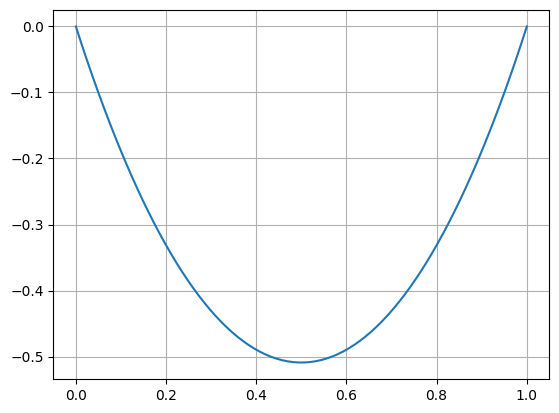



Corda com 1 força para baixo


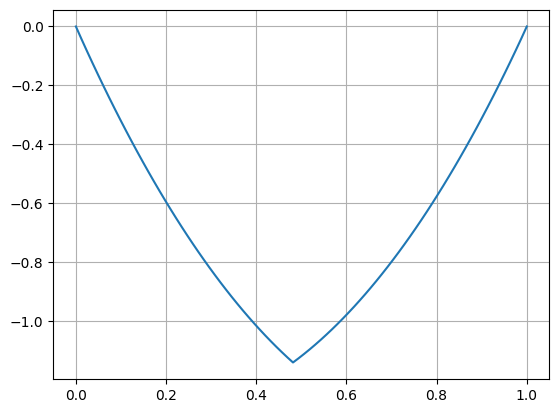

/tmp/ipython-input-2458620667.py:132: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()




Corda com 1 força para baixo e uma para cima


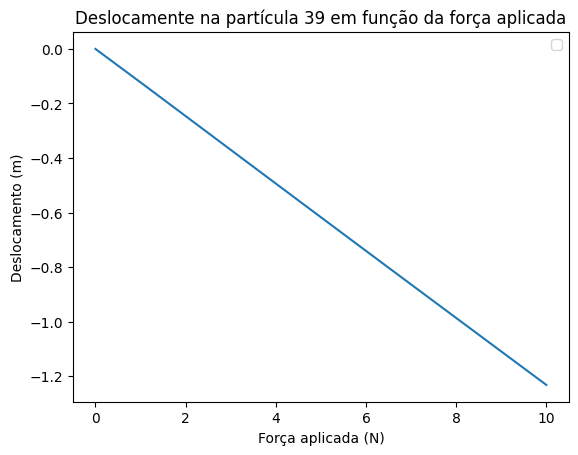

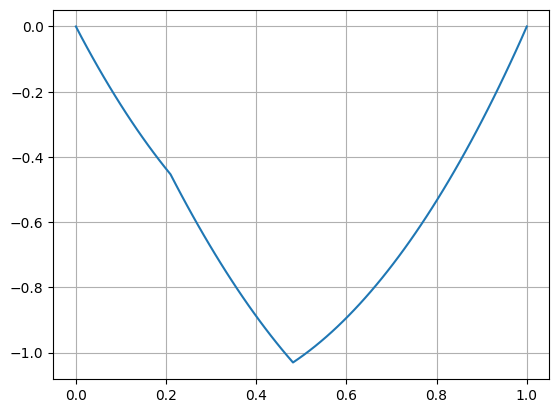



Corda com 1 força para baixo e duas para cima


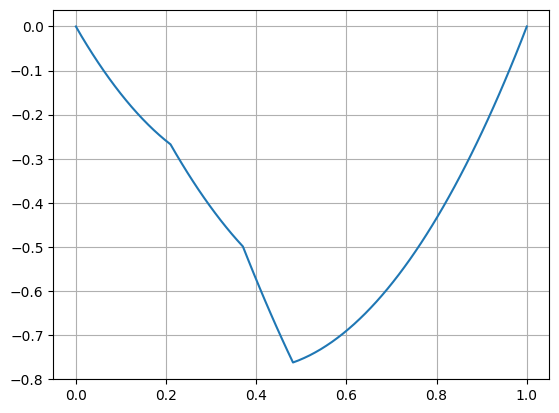

In [ ]:
# Mini projeto

import numpy as np
from matplotlib import pyplot as plt

import numpy as np

def is_solution(M, c, s, erro):
    mascara = np.linalg.norm(M @ c - s) < erro
    return np.all(mascara) # Se todas as variáveis estão dentro do erro estipulado estão é solução

def ite_jacobi(M, s, co, erro, N):
    c = co.copy()
    counter = 0

    while is_solution(M, c, s, erro) == False: # Enquanto não for solução o processo iterativo rodará a menos de atingir o limite de iterações
      if counter >= N:
          raise ValueError(f"Atingiu-se o número máximo de iterações ({N}) e não foi possível encontrar a solução.")

      c = np.zeros_like(co, dtype = float) # Inicializa o novo vetor que armazenará os próximos dados da iteração
      for i in range(M.shape[0]): # Algoritmo para a iteração de jacobi
          somatorio = 0
          for j in range(M.shape[0]):
              if j != i:
                  somatorio += M[i][j] * co[j]
          c[i] = (s[i] - somatorio) / M[i][i]

      counter += 1
      co = c.copy()

    return c

def rho(x): # Função densidade linear
  return 1

def soma_Riemann(funcao, lim_inf , lim_sup ,N): # Soma de Riemann para calcular a integral, é utilizada para encontrar a massa de um segmento da corda
  soma = 0
  particao = np.linspace(lim_inf, lim_sup, N)
  delta_x = (lim_sup - lim_inf)/N
  for ponto in particao:
    soma += funcao(ponto)
  return soma*delta_x

def calcular_massas(N, rho, l ): # Retornará um vetor com as massas de cada partícula na qual a corda foi discretizada

  lo = l/(N+1) # o comprimento de cada segmento é o comprimento da corda l, dividido pelo número de partículas acrescido de 1
  vetor_massas = np.zeros(N) # Inicializa o vetor que carregará o valor para as N massas do sistema, em que o indice do vetor indica a massa em questão
  vetor_massas[0] = soma_Riemann(rho, 0, 1.5*lo, 500)
  vetor_massas[N-1] = soma_Riemann(rho, l - lo*1.5, l, 500)
  for i in range(1 , N-1):
    vetor_massas[i] = soma_Riemann(rho, lo*(i+1) - lo/2 , lo*(i+1) + lo/2, 1000)

  return vetor_massas

def posicao_eq(N: int, massas, l: float , T: float, g: float, forcas):
  """
  Função que calculará a posição de equilíbrio do sistema, quantidade e partículas ,dado as massas, tensão da corda, gravidade e as forças adicionais que foram aplicadas.
  """
  posicoes_inicial = np.zeros(N) # inicializa um vetor de tamanho N com entradas todas nulas e representará as posições iniciais de todas as massas discretizas da corda
  s = np.zeros(N)
  matriz = np.zeros((N,N))
  matriz[0, 0:2] = [2,-1]
  for i in range(1,N-1):
    matriz[i, i-1:i+2] = [-1,2,-1]
  matriz[N-1, N-2:N] = [-1,2]
  for i in range(N):
    s[i] = (forcas[i] - massas[i]*g)

  posicoes = ite_jacobi(matriz, s*((l)/(T*(N+1))), posicoes_inicial, 10**-3, 10000)

  posicoes = np.append(0, posicoes)
  posicoes = np.append(posicoes,0)

  return posicoes

def plotar_corda(N, posicoes):
  lista_x = []
  l = 1
  for i in range(N+2):
    lista_x.append(i*(l/(N+1)))
  plt.plot(lista_x, posicoes)
  plt.grid()
  plt.show()

N = 80

massas = calcular_massas(N, rho, 1)

print("Corda Livre")

# Corda livre

forcas = np.zeros(N)

posicoes = posicao_eq(N, massas, 1, 2, 9.81, forcas)

posicao_39 = posicoes[38]

plotar_corda(N, posicoes)

print('\n')


# Corda com 1 força para baixo

print("Corda com 1 força para baixo")

forcas = np.zeros(N)
forcas[38] = -5

posicoes = posicao_eq(N, massas, 1, 2, 9.81, forcas)

plotar_corda(N, posicoes)

print('\n')

# Calcular o deslocamento pra diferentes valores da força

deslocamento = []

forcas_39 = np.linspace(0, 10, 10)

for forca in forcas_39:
  forcas = np.zeros(N)
  forcas[38] = -forca
  posicoes = posicao_eq(N, massas, 1, 2, 9.81, forcas)
  deslocamento.append(posicoes[38] - posicao_39)

plt.title("Deslocamente na partícula 39 em função da força aplicada")
plt.xlabel("Força aplicada (N)")
plt.ylabel("Deslocamento (m)")
plt.legend()
plt.plot(forcas_39, deslocamento)

plt.figure()

print('\n')

#   Corda com 1 força para baixo e uma para cima

print("Corda com 1 força para baixo e uma para cima")

forcas = np.zeros(N)
forcas[38] = -5
forcas[16] = 2

posicoes = posicao_eq(N, massas, 1, 2, 9.81, forcas)

plotar_corda(N, posicoes)

print('\n')

# Corda com 1 força para baixo e duas para cima

print("Corda com 1 força para baixo e duas para cima")

forcas = np.zeros(N)
forcas[38] = -5
forcas[16] = 2
forcas[29] = 3

posicoes = posicao_eq(N, massas, 1, 2, 9.81, forcas)

plotar_corda(N, posicoes)






Corda Livre


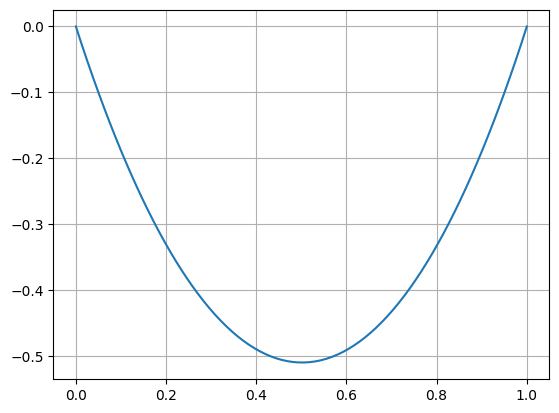



Corda com 1 força para baixo


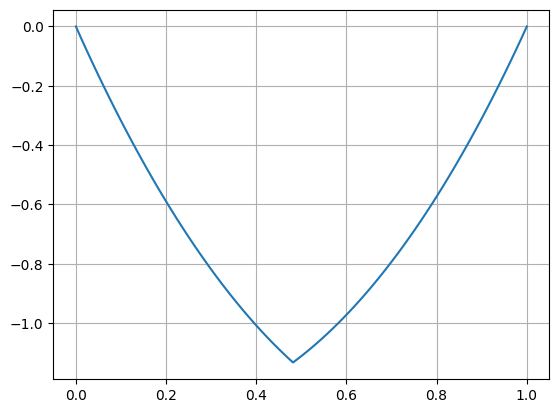

/tmp/ipython-input-3145083378.py:103: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()




Corda com 1 força para baixo e uma para cima


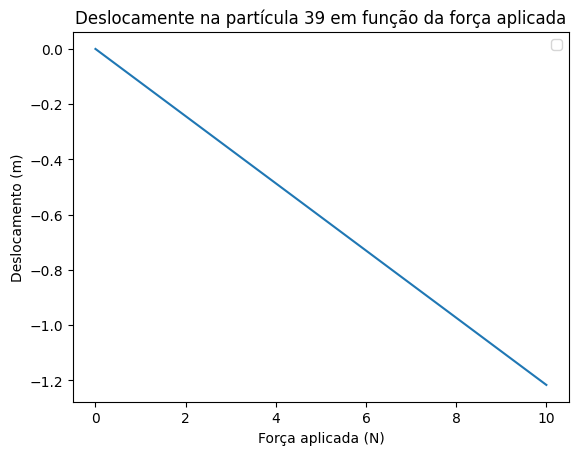

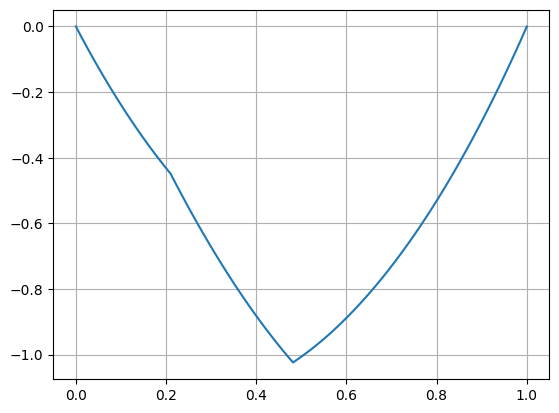



Corda com 1 força para baixo e duas para cima


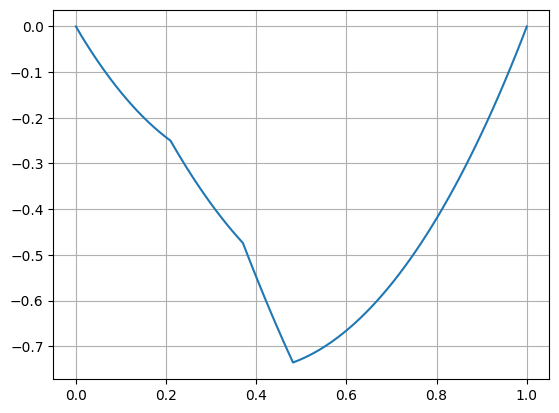

In [ ]:
# Mini projeto - Gauss-Seidel

import numpy as np

def rho(x):
  return 1

def gauss_seidel(M, s, co, erro, N):
  c = co.copy()
  counter = 0

  while is_solution(M, c, s, erro) == False:
    if counter >= N:
        raise ValueError(f"Atingiu-se o número máximo de iterações ({N}) e não foi possível encontrar a solução.")
    for i in range(M.shape[0]):
        somatorio = 0
        for j in range(M.shape[0]):
            if j != i:
                somatorio += M[i][j] * c[j]
        c[i] = (s[i] - somatorio) / M[i][i]

    counter += 1

  return c


def calcular_massas(N, rho, l ):

  lo = l/(N+1) # o comprimento de cada segmento é o comprimento da corda l, dividido pelo número de partículas acrescido de 1
  vetor_massas = np.zeros(N) # Inicializa o vetor que carregará o valor para as N massas do sistema, em que o indice do vetor indica a massa em questão
  vetor_massas[0] = soma_Riemann(rho, 0, 1.5*lo, 500)
  vetor_massas[N-1] = soma_Riemann(rho, l - lo*1.5, l, 500)
  for i in range(1 , N-1):
    vetor_massas[i] = soma_Riemann(rho, lo*(i+1) - lo/2 , lo*(i+1) + lo/2, 1000)

  return vetor_massas

def posicao_eq_gs(N: int, massas, l: float , T: float, g: float, forcas):
  posicoes_inicial = np.zeros(N)
  s = np.zeros(N)
  matriz = np.zeros((N,N))
  matriz[0, 0:2] = [2,-1]
  for i in range(1,N-1):
    matriz[i, i-1:i+2] = [-1,2,-1]
  matriz[N-1, N-2:N] = [-1,2]
  for i in range(N):
    s[i] = (forcas[i] - massas[i]*g)

  posicoes = gauss_seidel(matriz, s*((l)/(T*(N+1))), posicoes_inicial, 10**-3, 10000)

  posicoes = np.append(0, posicoes)
  posicoes = np.append(posicoes,0)

  return posicoes

N = 80

massas = calcular_massas(N, rho, 1)

print("Corda Livre")

# Corda livre

forcas = np.zeros(N)

posicoes = posicao_eq_gs(N, massas, 1, 2, 9.81, forcas)

posicao_39 = posicoes[38]

plotar_corda(N, posicoes)

print('\n')


# Corda com 1 força para baixo

print("Corda com 1 força para baixo")

forcas = np.zeros(N)
forcas[38] = -5

posicoes = posicao_eq_gs(N, massas, 1, 2, 9.81, forcas)

plotar_corda(N, posicoes)

print('\n')

# Calcular o deslocamento pra diferentes valores da força

deslocamento = []

forcas_39 = np.linspace(0, 10, 10)

for forca in forcas_39:
  forcas = np.zeros(N)
  forcas[38] = -forca
  posicoes = posicao_eq_gs(N, massas, 1, 2, 9.81, forcas)
  deslocamento.append(posicoes[38] - posicao_39)

plt.title("Deslocamente na partícula 39 em função da força aplicada")
plt.xlabel("Força aplicada (N)")
plt.ylabel("Deslocamento (m)")
plt.legend()
plt.plot(forcas_39, deslocamento)

plt.figure()

print('\n')

#   Corda com 1 força para baixo e uma para cima

print("Corda com 1 força para baixo e uma para cima")

forcas = np.zeros(N)
forcas[38] = -5
forcas[16] = 2

posicoes = posicao_eq_gs(N, massas, 1, 2, 9.81, forcas)

plotar_corda(N, posicoes)

print('\n')

# Corda com 1 força para baixo e duas para cima

print("Corda com 1 força para baixo e duas para cima")

forcas = np.zeros(N)
forcas[38] = -5
forcas[16] = 2
forcas[29] = 3

posicoes = posicao_eq_gs(N, massas, 1, 2, 9.81, forcas)

plotar_corda(N, posicoes)


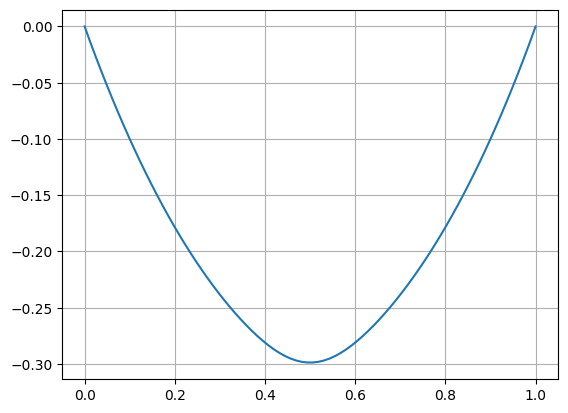

In [ ]:
# Mini projeto - densidade não constante

def rho(x):
  """
  Função densidade linear
  """
  return 0.5 * (1 + np.exp(-100 * (x - 0.5)**2))

N = 80

forcas = np.zeros(N)

posicoes = posicao_eq(N,  calcular_massas(N, rho, 1), 1, 2, 9.81, forcas)

plotar_corda(N,posicoes)





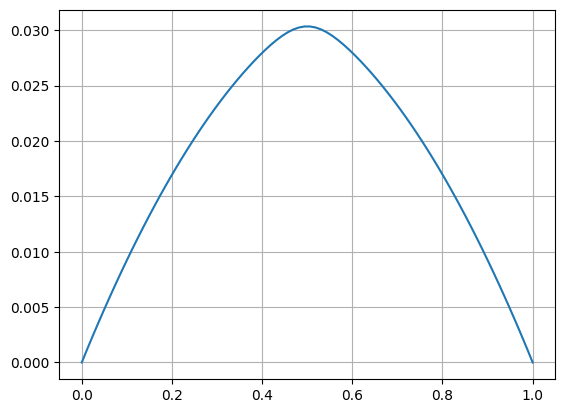

In [ ]:
# Mini Projeto - Empuxo

import numpy as np
import matplotlib.pyplot as plt

rho_volumetrico = 900 # Densidade volumétrica da corda é constante

def fi(x):
  """
  Função diametro da corda ao longo dela
  """
  return 0.02*(1+ np.exp(-200*((x-0.5))**2))

def integral_cilindrica_volume(funcao, lim_inf , lim_sup ,N):
  """
  Integral que utilizada cilindro infinitesimais para calcular o volume da corda
  """
  particao = np.linspace(lim_inf, lim_sup, N)
  delta_x = (lim_sup - lim_inf)/N
  y = np.array(funcao(particao)**2)
  return np.sum(y)*delta_x*np.pi*0.25


def calcular_volume(N, fi, l):
  """
  Função que retorna um vetor com os volumes de cada segmento da corda
  """
  lo = l/(N+1) # Tamanho de cada segmento da corda
  vetor_volume = np.zeros(N)
  vetor_volume[0] = integral_cilindrica_volume(fi, 0, 1.5*lo, 200)
  vetor_volume[N-1] = integral_cilindrica_volume(fi, l - lo*1.5 , l,200)
  for i in range(1 , N-1):
    vetor_volume[i] = integral_cilindrica_volume(fi, lo*(i+1) - lo/2 , lo*(i+1) + lo/2, 500)

  return vetor_volume

def empuxo(rho_f, g, vetor_volume):
  """
  Retorna o módulo da força de empuxo que cada segmento da corda sofre
  """
  return vetor_volume*(g*rho_f)

def posicao_eq_emp(N: int, massas, l: float , T: float, g: float, forcas):
  posicoes_inicial = np.zeros(N)
  s = np.zeros(N)
  matriz = np.zeros((N,N))
  matriz[0, 0:2] = [2,-1]
  for i in range(1,N-1):
    matriz[i, i-1:i+2] = [-1,2,-1]
  matriz[N-1, N-2:N] = [-1,2]
  empuxos =  empuxo(rho_fluido, g, vetor_volume)
  for i in range(N):
    s[i] = (forcas[i] + empuxos[i] - massas[i]*g)

  posicoes = gauss_seidel(matriz, s*((l)/(T*(N+1))), posicoes_inicial, 10**-5, 10000*2)

  posicoes = np.append(0, posicoes)
  posicoes = np.append(posicoes,0)

  return posicoes

# Simulação

N = 80

forcas = np.zeros(N)
rho_fluido = 1000

vetor_volume = calcular_volume(N, fi, 1)

posicoes = posicao_eq_emp(N,  rho_volumetrico*vetor_volume, 1, 2, 9.81, forcas)

plotar_corda(N,posicoes)

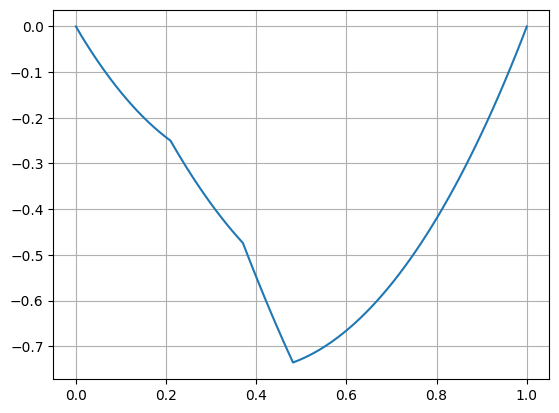

In [ ]:
# Mini projeto - Gauss-Seidel

def rho(x):
  return 1

def gauss_seidel(M, s, co, erro, N):
  c = co.copy()
  counter = 0

  while is_solution(M, c, s, erro) == False:
    if counter >= N:
        raise ValueError(f"Atingiu-se o número máximo de iterações ({N}) e não foi possível encontrar a solução.")
    for i in range(M.shape[0]):
        somatorio = 0
        for j in range(M.shape[0]):
            if j != i:
                somatorio += M[i][j] * c[j]
        c[i] = (s[i] - somatorio) / M[i][i]

    counter += 1

  return c


def calcular_massas(N, rho, l ):

  lo = l/(N+1) # o comprimento de cada segmento é o comprimento da corda l, dividido pelo número de partículas acrescido de 1
  vetor_massas = np.zeros(N) # Inicializa o vetor que carregará o valor para as N massas do sistema, em que o indice do vetor indica a massa em questão
  vetor_massas[0] = soma_Riemann(rho, 0, 1.5*lo, 500)
  vetor_massas[N-1] = soma_Riemann(rho, l - lo*1.5, l, 500)
  for i in range(1 , N-1):
    vetor_massas[i] = soma_Riemann(rho, lo*(i+1) - lo/2 , lo*(i+1) + lo/2, 1000)

  return vetor_massas

def posicao_eq_gs(N: int, massas, l: float , T: float, g: float, forcas):
  posicoes_inicial = np.zeros(N)
  s = np.zeros(N)
  matriz = np.zeros((N,N))
  matriz[0, 0:2] = [2,-1]
  for i in range(1,N-1):
    matriz[i, i-1:i+2] = [-1,2,-1]
  matriz[N-1, N-2:N] = [-1,2]
  for i in range(N):
    s[i] = (forcas[i] - massas[i]*g)

  posicoes = gauss_seidel(matriz, s*((l)/(T*(N+1))), posicoes_inicial, 10**-3, 10000)

  posicoes = np.append(0, posicoes)
  posicoes = np.append(posicoes,0)

  return posicoes

N = 80

forcas = np.zeros(N)
forcas[38] = -5
forcas[16] = 2
forcas[29] = 3

posicoes = posicao_eq_gs(N, calcular_massas(N, rho, 1), 1, 2, 9.81, forcas)

plotar_corda(N, posicoes)